In [1]:
from utils import *

patients = data_preprocessing('AE_Visit_example20k.csv')
X_train, X_test, y_train, y_test = split_data(patients, two_classes=True)


In [2]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 10736, 1.0: 3589}


In [15]:
from sklearn.metrics import classification_report

def evaluate_model(y_test, y_pred):
    predict_binary = (y_pred[:, 1] > 0.5).astype(int)
    print(classification_report(y_test, predict_binary))

In [4]:
from my_model import MyModel

from lstm_model import LSTM
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

params = {'hidden_size': 64, 'lr': 0.001, 'num_epochs': 500, 'region_embedding_dim': 16,
          'time_embedding_dim': 32, 'batch_size': 20000, 'output_size': 1}

xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'tree_method': "hist",
    'objective': 'binary:logistic',
}

lgb_params = {
    'objective': 'binary',
    'learning_rate': 0.01,
}

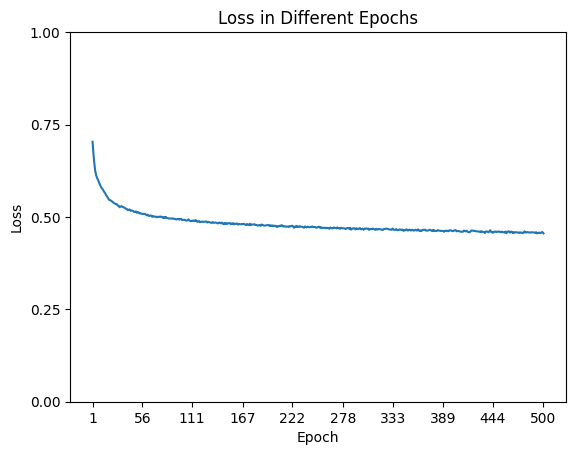

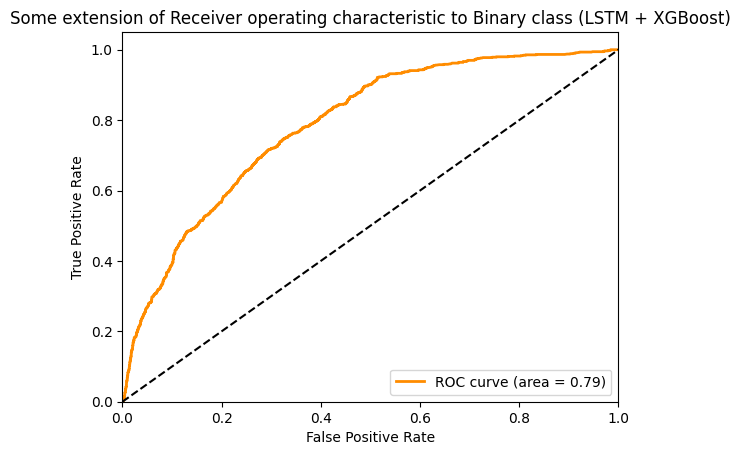

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2586
         1.0       0.63      0.29      0.39       894

    accuracy                           0.77      3480
   macro avg       0.71      0.61      0.63      3480
weighted avg       0.75      0.77      0.74      3480



In [5]:
myLSTM = LSTM(vocab_size=20, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=params['output_size'])
xgb_classifier = XGBClassifier(**xgb_params)
my_model = MyModel(myLSTM, params, xgb_classifier, n_class=params['output_size'])
lstm, xgb = my_model.train(X_train, y_train, show_loss=True)
predict_proba, labels = my_model.evaluate(lstm, X_test, y_test, xgb)
draw_roc_curve(predict_proba, labels, 'LSTM + XGBoost')
evaluate_model(y_test, predict_proba)

[LightGBM] [Info] Number of positive: 3589, number of negative: 10736
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16577
[LightGBM] [Info] Number of data points in the train set: 14325, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250541 -> initscore=-1.095729
[LightGBM] [Info] Start training from score -1.095729


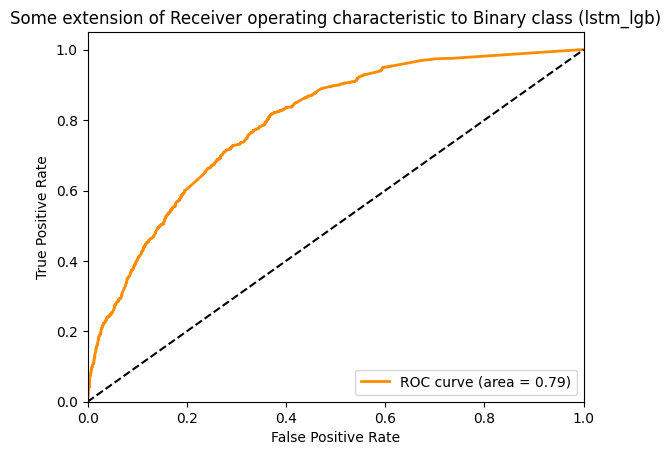

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      2586
         1.0       0.74      0.16      0.27       894

    accuracy                           0.77      3480
   macro avg       0.75      0.57      0.56      3480
weighted avg       0.76      0.77      0.71      3480



In [6]:
myLSTM = LSTM(vocab_size=20, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=params['output_size'])
lgb_classifier = LGBMClassifier(**lgb_params)
my_model = MyModel(myLSTM, params, lgb_classifier, n_class=params['output_size'])
lstm, lgb = my_model.train(X_train, y_train)
predict_proba, labels = my_model.evaluate(lstm, X_test, y_test, lgb)
draw_roc_curve(predict_proba, labels, 'lstm_lgb')
evaluate_model(y_test, predict_proba)

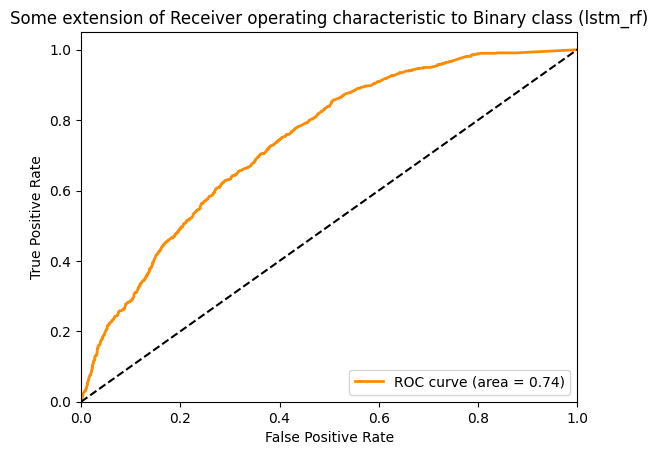

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      2586
         1.0       0.49      0.42      0.45       894

    accuracy                           0.74      3480
   macro avg       0.65      0.63      0.64      3480
weighted avg       0.73      0.74      0.73      3480



In [7]:
myLSTM = LSTM(vocab_size=20, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=params['output_size'])
rf_classifier = RandomForestClassifier(n_estimators=300)
my_model = MyModel(myLSTM, params, rf_classifier, n_class=params['output_size'])
lstm, rf = my_model.train(X_train, y_train)
predict_proba, labels = my_model.evaluate(lstm, X_test, y_test, rf)
draw_roc_curve(predict_proba, labels, 'lstm_rf')
evaluate_model(y_test, predict_proba)

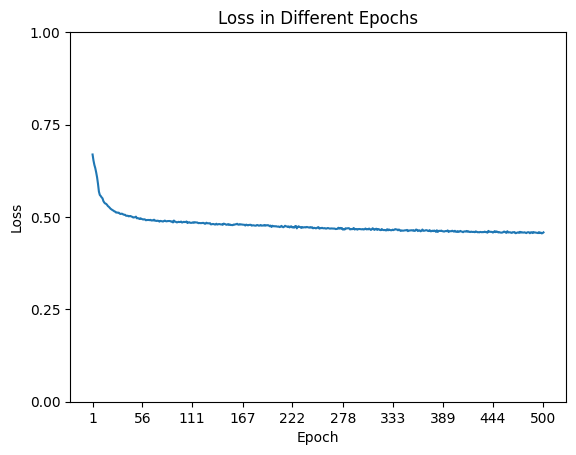

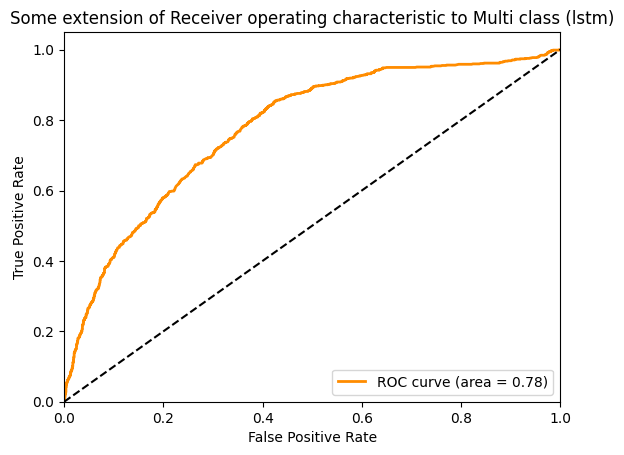

IndexError: index 1 is out of bounds for axis 1 with size 1

In [8]:
myLSTM = LSTM(vocab_size=20, region_embedding_dim=params['region_embedding_dim'],
              time_embedding_dim=params['time_embedding_dim'], hidden_size=params['hidden_size'], output_size=params['output_size'])
my_model = MyModel(myLSTM, params, n_class=params['output_size'])
lstm = my_model.train(X_train, y_train, show_loss=True)
predict_proba, labels = my_model.evaluate(lstm, X_test, y_test)
draw_roc_curve(predict_proba, labels, 'lstm')
evaluate_model(y_test, predict_proba)

In [11]:
evaluate_model(y_test, predict_proba)

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      2586
         1.0       0.67      0.23      0.34       894

    accuracy                           0.77      3480
   macro avg       0.73      0.60      0.60      3480
weighted avg       0.75      0.77      0.73      3480



[LightGBM] [Info] Number of positive: 3589, number of negative: 10736
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 14325, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250541 -> initscore=-1.095729
[LightGBM] [Info] Start training from score -1.095729


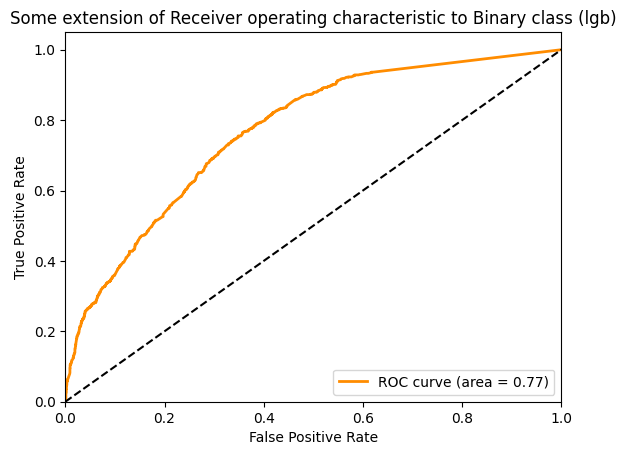

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2586
         1.0       0.83      0.06      0.11       894

    accuracy                           0.76      3480
   macro avg       0.79      0.53      0.49      3480
weighted avg       0.77      0.76      0.67      3480



In [16]:
lgb_classifier = LGBMClassifier(**lgb_params)
lgb_classifier.fit(X_train, y_train)
predict_proba = lgb_classifier.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'lgb')
evaluate_model(y_test, predict_proba)

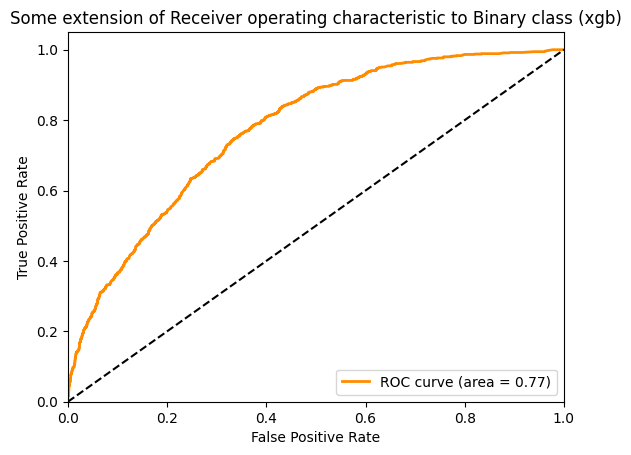

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      2586
         1.0       0.65      0.24      0.35       894

    accuracy                           0.77      3480
   macro avg       0.72      0.60      0.60      3480
weighted avg       0.75      0.77      0.73      3480



In [17]:
xgb_classifier = XGBClassifier(**xgb_params)
xgb_classifier.fit(X_train, y_train)
predict_proba = xgb_classifier.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'xgb')
evaluate_model(y_test, predict_proba)

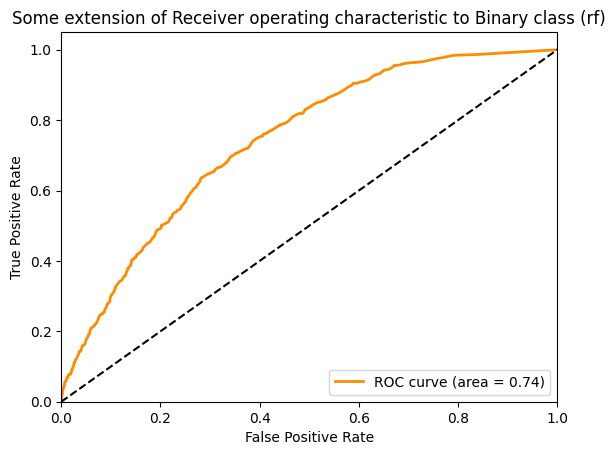

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84      2586
         1.0       0.50      0.34      0.40       894

    accuracy                           0.74      3480
   macro avg       0.65      0.61      0.62      3480
weighted avg       0.72      0.74      0.73      3480



In [18]:
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(X_train, y_train)
predict_proba = rf_classifier.predict_proba(X_test)
draw_roc_curve(predict_proba, y_test, 'rf')
evaluate_model(y_test, predict_proba)